### Import Requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
from scipy import stats
import sklearn
from sklearn import metrics
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
pd.set_option('display.max_columns',None)

In [2]:
dt=pd.read_csv('laptop_details.csv')
dt.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [3]:
print(dt['Feature'][0])
print(dt['Feature'][2])
print(dt['Feature'][6])

Intel Core i3 Processor (11th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System256 GB SSD35.56 cm (14 inch) DisplayOffice Home and Student 20212 Year Onsite�Warranty
Intel Core i3 Processor (10th Gen)8 GB DDR4 RAM64 bit Windows 11 Operating System512 GB SSD39.62 cm (15.6 inch) DisplayOffice Home and Student 20211 Year Onsite Warranty
Processor: Intel i3-1115G4 (Base- 1.70 GHz & Turbo up to 4.10 GHz) 2 CoresRAM & Storage: 8GB DDR4 & 1TB + 256GB SSDGraphics & Keyboard: Integrated & Standard KeyboardDisplay: 15.6" FHD WVA AG Narrow BorderPorts: 2x USB 3.2 Gen1 ,1x USB 2.0, HDMI 1.4, SD Card reader, Audio jack, 1 M.2 2230/2280 slot for solid-state drive/Intel OptaneIntel Core i3 Processor (11th Gen)8 GB DDR4 RAMWindows 11 Operating System1 TB HDD|256 GB SSD39.62 cm (15.6 inch) Display1 YEAR


In [4]:
# Processor Information

regex = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

dt['Processor'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [5]:
dt.head()

,Product,Rating,MRP,Feature,Processor
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor]


In [6]:
# RAM Information

regex = r'\d+\sGB[\s\w]+RAM'

dt['RAM'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [7]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]


In [8]:
# OS 

regex = r'[\d]+[\s]bit[\s\w]+Operating System'

dt['OS'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [9]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[]


In [10]:
# Storage

regex = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

dt['Storage'] = dt['Feature'].apply(lambda x : re.findall(regex, x))

In [11]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD]


In [12]:
# Brand

regex = r'^\w+'

dt['Brand'] = dt['Product'].apply(lambda x : re.findall(regex, x))

In [13]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


### Exploratory Data Analysis

In [14]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [15]:
# Missing Values

dt.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [16]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


In [17]:
print(dt['Processor'][0])

['Intel Core i3 Processor']


In [18]:
print(''.join(dt['Processor'][0]))

Intel Core i3 Processor


In [19]:
dt.Processor = dt.Processor.apply(lambda x : ''.join(x))
dt.RAM = dt.RAM.apply(lambda x : ''.join(x))
dt.OS = dt.OS.apply(lambda x : ''.join(x))
dt.Storage = dt.Storage.apply(lambda x : ''.join(x))
dt.Brand = dt.Brand.apply(lambda x : ''.join(x))

In [20]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [21]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [22]:
# Manipulating MRP values

dt.MRP = dt.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [23]:
dt.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [24]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.8+ KB


In [25]:
dt['OS'].unique()

array(['64 bit Windows 11 Operating System',
       '64 bit Windows 10 Operating System', '',
       '32 bit Windows 11 Operating System',
       '64 bit DOS Operating System', '64 bit Chrome Operating System'],
      dtype=object)

In [26]:
a = []
for i in dt['OS']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['OS']=a

In [27]:
dt['OS'].value_counts(normalize=True)*100

64 bit Windows 11 Operating System    76.952381
64 bit Windows 10 Operating System    22.285714
64 bit DOS Operating System            0.380952
32 bit Windows 11 Operating System     0.190476
64 bit Chrome Operating System         0.190476
Name: OS, dtype: float64

In [28]:
dt["Processor"].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', '', 'AMD Ryzen 7 Quad Core Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor',
       'AMD Ryzen 3 Quad Core Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'Intel Core i9 Processor', 'Intel Pentium Silver Processor',
       'AMD Ryzen 5 Dual Core Processor',
       'Intel Pentium Quad Core Processor', 'AMD Dual Core Processor',
       'AMD Ryzen 3 Hexa Core Processor'], dtype=object)

In [29]:
a = []
for i in dt['Processor']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['Processor']=a

In [30]:
dt['Processor'].value_counts(normalize=True)*100

Intel Core i5 Processor              22.421525
Intel Core i3 Processor              19.282511
AMD Ryzen 9 Octa Core Processor      13.004484
AMD Ryzen 7 Octa Core Processor      11.808670
Intel Core i7 Processor               7.324365
AMD Ryzen 5 Hexa Core Processor       7.174888
AMD Ryzen 3 Dual Core Processor       6.278027
AMD Ryzen 5 Quad Core Processor       5.530643
Intel Celeron Dual Core Processor     2.989537
Intel Core i9 Processor               1.494768
AMD Ryzen 3 Quad Core Processor       0.597907
Intel Pentium Quad Core Processor     0.448430
Intel Celeron Quad Core Processor     0.448430
Intel Pentium Silver Processor        0.298954
AMD Athlon Dual Core Processor        0.298954
AMD Ryzen 5 Dual Core Processor       0.149477
AMD Ryzen 7 Quad Core Processor       0.149477
AMD Dual Core Processor               0.149477
AMD Ryzen 3 Hexa Core Processor       0.149477
Name: Processor, dtype: float64

In [31]:
dt['RAM'].unique()

array(['8 GB DDR4 RAM', '16 GB DDR4 RAM', '16 GB DDR5 RAM',
       '4 GB LPDDR4 RAM', '4 GB DDR4 RAM', '8 GB Unified Memory RAM',
       '8 GB LPDDR4X RAM', '16 GB Unified Memory RAM', '4 GB LPDDR4X RAM',
       '16 GB LPDDR4X RAM', '16 GB LPDDR5 RAM',
       '32 GB Unified Memory RAM', '16 GB LPDDR4 RAM', '32 GB DDR5 RAM',
       '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM',
       '8 GB DDR5 RAM', '32 GB DDR4 RAM', '32 GB LPDDR4X RAM',
       '16 GB LPDDR3 RAM'], dtype=object)

In [32]:
dt['RAM'].value_counts(normalize=True)*100

8 GB DDR4 RAM                                                                                             52.361111
16 GB DDR4 RAM                                                                                            21.250000
16 GB DDR5 RAM                                                                                            10.694444
4 GB DDR4 RAM                                                                                              3.611111
8 GB LPDDR4X RAM                                                                                           2.222222
16 GB LPDDR4X RAM                                                                                          2.222222
32 GB DDR5 RAM                                                                                             1.527778
16 GB LPDDR5 RAM                                                                                           1.250000
4 GB LPDDR4 RAM                                                         

In [33]:
dt['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '', '1 TB HDD', '128 GB SSD',
       '1 TB HDD512 GB SSD', '128 GB SSD1 TB HDD128 GB SSD', '2 TB SSD'],
      dtype=object)

In [34]:
a = []
for i in dt['Storage']:
    if i=='':
        a.append(np.nan)
    else:
        a.append(i)
dt['Storage']=a

In [35]:
dt['Storage'].value_counts(normalize=True)*100

512 GB SSD                      52.816901
1 TB SSD                        24.788732
256 GB SSD                      13.802817
1 TB HDD256 GB SSD               3.661972
1 TB HDD                         2.394366
2 TB SSD                         0.985915
128 GB SSD                       0.845070
1 TB HDD512 GB SSD               0.281690
128 GB SSD1 TB HDD128 GB SSD     0.281690
256 GB HDD256 GB SSD             0.140845
Name: Storage, dtype: float64

In [36]:
dt['Brand'].unique()

array(['Lenovo', 'ASUS', 'HP', 'DELL', 'RedmiBook', 'realme', 'acer',
       'MSI', 'APPLE', 'Infinix', 'SAMSUNG', 'Ultimus', 'Vaio',
       'GIGABYTE', 'Nokia', 'ALIENWARE'], dtype=object)

In [37]:
dt['Brand'].value_counts(normalize=True)*100

ASUS         34.861111
Lenovo       27.222222
HP            8.472222
DELL          8.472222
acer          4.861111
RedmiBook     4.305556
MSI           4.166667
Infinix       2.777778
APPLE         2.638889
realme        0.833333
ALIENWARE     0.416667
SAMSUNG       0.277778
Ultimus       0.277778
Vaio          0.138889
GIGABYTE      0.138889
Nokia         0.138889
Name: Brand, dtype: float64

### Handling Missing Values

In [38]:
# Null values

dt.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor     51
RAM            0
OS           195
Storage       10
Brand          0
dtype: int64

In [39]:
dt.drop('Rating',axis=1,inplace=True)

In [40]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,NaN,512 GB SSD,ASUS


In [41]:
dt.dropna(inplace=True)

In [42]:
dt.isnull().sum()

Product      0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

In [43]:
dt.shape

(492, 8)

In [44]:
dt['OS'].value_counts(normalize=True)*100

64 bit Windows 11 Operating System    79.471545
64 bit Windows 10 Operating System    19.918699
64 bit DOS Operating System            0.406504
32 bit Windows 11 Operating System     0.203252
Name: OS, dtype: float64

In [45]:
dt['Processor'].value_counts(normalize=True)*100

Intel Core i3 Processor              24.186992
Intel Core i5 Processor              21.544715
AMD Ryzen 7 Octa Core Processor       8.943089
AMD Ryzen 5 Hexa Core Processor       8.739837
Intel Core i7 Processor               8.739837
AMD Ryzen 3 Dual Core Processor       8.130081
AMD Ryzen 5 Quad Core Processor       7.520325
AMD Ryzen 9 Octa Core Processor       5.284553
Intel Core i9 Processor               2.032520
Intel Celeron Dual Core Processor     1.626016
AMD Ryzen 3 Quad Core Processor       0.813008
Intel Pentium Quad Core Processor     0.609756
Intel Celeron Quad Core Processor     0.609756
Intel Pentium Silver Processor        0.406504
AMD Athlon Dual Core Processor        0.406504
AMD Ryzen 7 Quad Core Processor       0.203252
AMD Dual Core Processor               0.203252
Name: Processor, dtype: float64

In [46]:
dt['RAM'].value_counts(normalize=True)*100

8 GB DDR4 RAM        60.569106
16 GB DDR4 RAM       15.243902
16 GB DDR5 RAM        8.130081
4 GB DDR4 RAM         4.065041
8 GB LPDDR4X RAM      3.048780
16 GB LPDDR4X RAM     3.048780
32 GB DDR5 RAM        2.235772
16 GB LPDDR5 RAM      1.219512
8 GB DDR5 RAM         0.813008
32 GB DDR4 RAM        0.609756
4 GB LPDDR4X RAM      0.406504
16 GB LPDDR4 RAM      0.203252
32 GB LPDDR4X RAM     0.203252
16 GB LPDDR3 RAM      0.203252
Name: RAM, dtype: float64

In [47]:
dt['Storage'].value_counts(normalize=True)*100

512 GB SSD            60.569106
256 GB SSD            16.666667
1 TB SSD              14.227642
1 TB HDD256 GB SSD     3.252033
1 TB HDD               2.845528
2 TB SSD               1.422764
128 GB SSD             0.813008
1 TB HDD512 GB SSD     0.203252
Name: Storage, dtype: float64

In [48]:
dt['MRP'].value_counts(normalize=True)*100

36990.0     7.926829
39990.0     6.300813
38705.0     6.097561
35590.0     5.284553
194990.0    3.861789
              ...   
41150.0     0.203252
44700.0     0.203252
200000.0    0.203252
83990.0     0.203252
90000.0     0.203252
Name: MRP, Length: 195, dtype: float64

### Data Visualization

In [49]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,HP


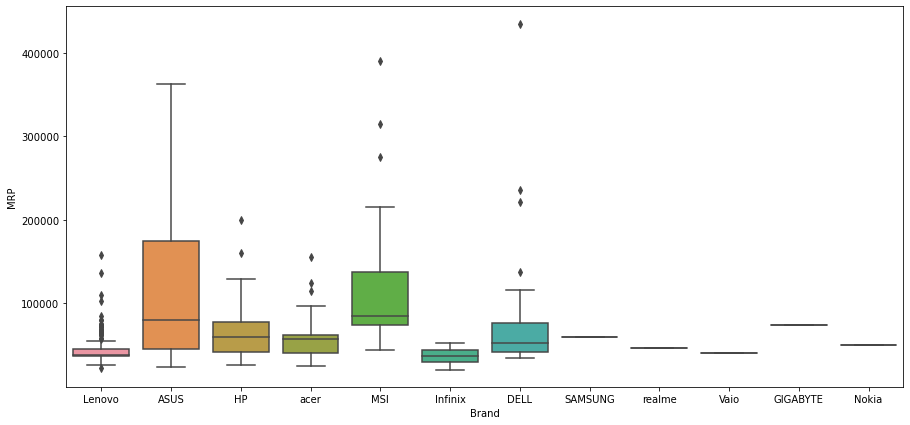

In [50]:
# Outliers Detection using Box plot

plt.figure(figsize=(15, 7))
sns.boxplot(x = dt.Brand, y = dt.MRP)
plt.show()

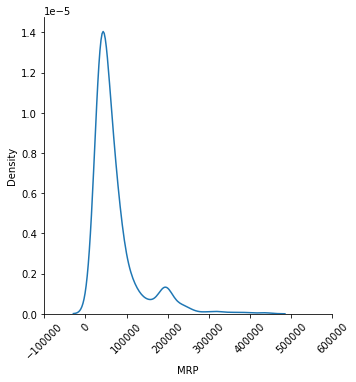

In [51]:
# Skewness

g = sns.displot(dt.MRP, kind='kde')
g.set_xticklabels(rotation=45)
plt.show()

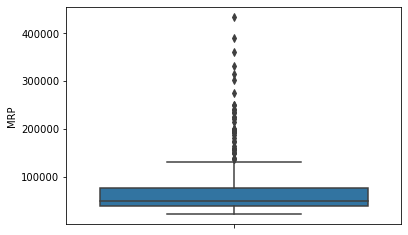

In [52]:
sns.boxplot(y = dt.MRP)
plt.show()

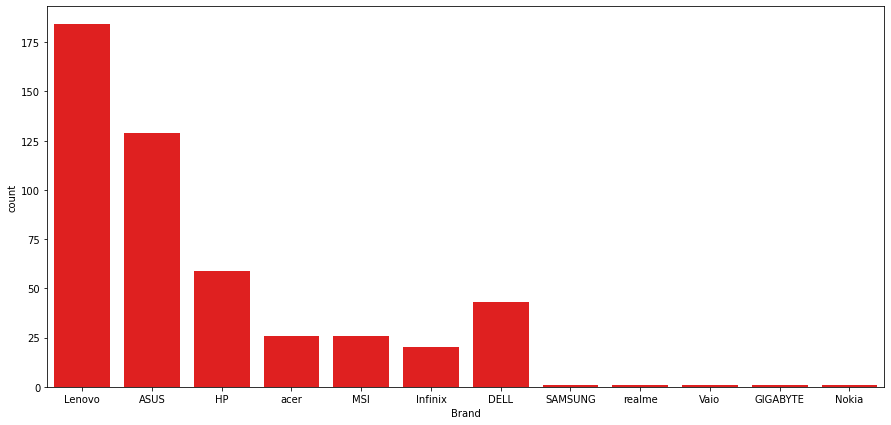

In [53]:
plt.figure(figsize=(15, 7))
sns.countplot(x=dt.Brand,color='r')
plt.show()

**Observation** - The above plot show us the count for each product. We can see that ASUS is havng highest number of product listing on Flipkart website

In [54]:
dt.groupby(['Brand']).agg({'MRP' : ['min', 'max', 'mean']})

MRP                         
              min       max           mean
Brand                                     
ASUS      23990.0  361990.0  106785.930233
DELL      34990.0  434830.0   76891.162791
GIGABYTE  73990.0   73990.0   73990.000000
HP        25990.0  199990.0   65599.135593
Infinix   20990.0   52990.0   36890.000000
Lenovo    23250.0  157990.0   46060.804348
MSI       43990.0  389990.0  125921.500000
Nokia     50490.0   50490.0   50490.000000
SAMSUNG   59990.0   59990.0   59990.000000
Vaio      40990.0   40990.0   40990.000000
acer      24990.0  155490.0   61071.423077
realme    46990.0   46990.0   46990.000000

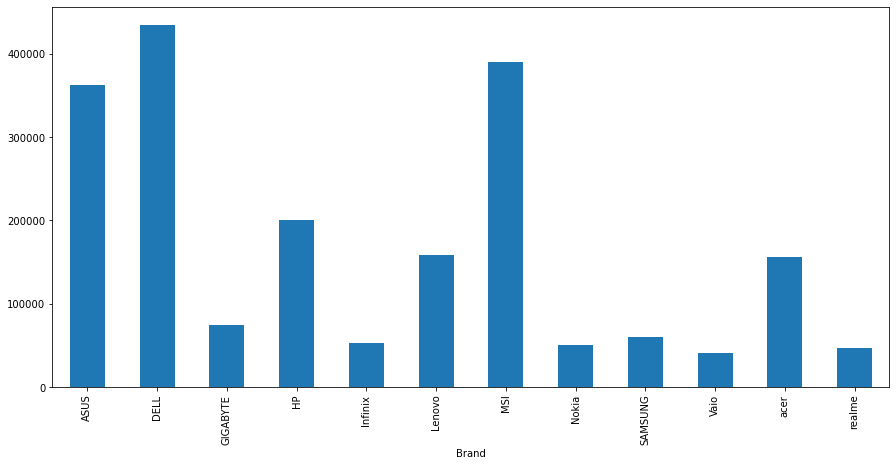

In [55]:
plt.figure(figsize=(15, 7))
dt.groupby(['Brand'])['MRP'].max().plot(kind='bar')
plt.show()

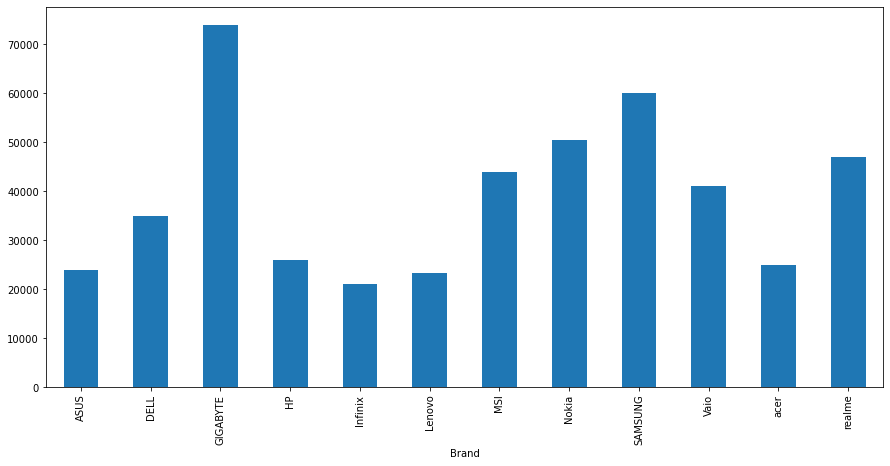

In [56]:
plt.figure(figsize=(15, 7))
dt.groupby(['Brand'])['MRP'].min().plot(kind = 'bar')
plt.show()

In [57]:
pd.cut(dt['MRP'],[20000,50000,150000,450000]).value_counts(normalize=True)*100

(20000, 50000]      51.219512
(50000, 150000]     38.821138
(150000, 450000]     9.959350
Name: MRP, dtype: float64

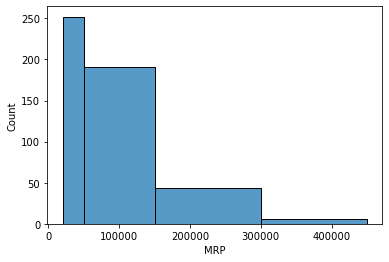

In [58]:
sns.histplot(dt.MRP,bins=[20000,50000,150000,300000,450000])
plt.show()

### Feature Selection`

In [59]:
dt.head()

,Product,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
5,HP 14s Intel Core i3 11th Gen - (8 GB/256 GB S...,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,HP


In [60]:
dt.columns

Index(['Product', 'MRP', 'Feature', 'Processor', 'RAM', 'OS', 'Storage',
       'Brand'],
      dtype='object')

In [61]:
new_f=['Processor', 'RAM', 'OS', 'Storage', 'MRP']

df=pd.DataFrame(dt,columns=new_f)

In [62]:
df.head()

,Processor,RAM,OS,Storage,MRP
0,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,36990.0
1,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,39990.0
2,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,32990.0
3,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,49990.0
5,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,36990.0


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 719
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Processor  492 non-null    object 
 1   RAM        492 non-null    object 
 2   OS         492 non-null    object 
 3   Storage    492 non-null    object 
 4   MRP        492 non-null    float64
dtypes: float64(1), object(4)
memory usage: 23.1+ KB


In [64]:
df.shape

(492, 5)

In [65]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MRP,492.0,71746.560976,57695.886647,20990.0,38705.0,49169.0,75992.5,434830.0


In [66]:
df.describe(include=["object"]).T

,count,unique,top,freq
Processor,492,17,Intel Core i3 Processor,119
RAM,492,14,8 GB DDR4 RAM,298
OS,492,4,64 bit Windows 11 Operating System,391
Storage,492,8,512 GB SSD,298


In [67]:
# Numerical Columns

num_data=[i for i in list(df.columns) if df[i].dtype!='O']
num_data

['MRP']

In [68]:
# Catagorical Columns

cat_data=[j for j in list(df.columns) if df[j].dtype=='O']
cat_data

['Processor', 'RAM', 'OS', 'Storage']

## Correlation Test

### Chi-Squared Test

Tests whether two categorical variables are related or independent.

**Interpretation**

H0: the two samples are independent.

H1: there is a dependency between the samples.

#### Numerical vs Catagorical Column

In [69]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=num_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('MRP',), value='MRP'), Dropdown(description='col2'…

<function __main__.chi_test(col1, col2)>

#### Categorical vs Categorical Column

In [70]:
def chi_test(col1,col2):
    ct = pd.crosstab(df[col1],df[col2])
    stat, p, dof, expected = stats.chi2_contingency(ct)
    alpha = 0.05
    print()
    print("p value : " + str(p)) 
    print()
    if p <= alpha:
        print('{} and {} both are Dependent (Reject H0)'.format(col1,col2))
    else:
        print('{} and {} both are Independent (H0 holds true)'.format(col1,col2))

widgets.interact(chi_test,col1=cat_data,col2=cat_data)

interactive(children=(Dropdown(description='col1', options=('Processor', 'RAM', 'OS', 'Storage'), value='Proce…

<function __main__.chi_test(col1, col2)>

In [71]:
np.round((pd.crosstab(df.OS,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,2 TB SSD,256 GB SSD,512 GB SSD,All
OS,,,,,,,,,
32 bit Windows 11 Operating System,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.20,0.20
64 bit DOS Operating System,0.00,0.00,0.0,0.00,0.00,0.00,0.20,0.20,0.41
64 bit Windows 10 Operating System,2.44,1.83,0.2,2.85,0.00,0.20,3.25,9.15,19.92
64 bit Windows 11 Operating System,0.41,1.42,0.0,11.38,0.81,1.22,13.21,51.02,79.47
All,2.85,3.25,0.2,14.23,0.81,1.42,16.67,60.57,100.00


In [72]:
np.round((pd.crosstab(df.OS,dt.RAM,margins=True)/len(df))*100,2)

RAM,16 GB DDR4 RAM,16 GB DDR5 RAM,16 GB LPDDR3 RAM,16 GB LPDDR4 RAM,16 GB LPDDR4X RAM,16 GB LPDDR5 RAM,32 GB DDR4 RAM,32 GB DDR5 RAM,32 GB LPDDR4X RAM,4 GB DDR4 RAM,4 GB LPDDR4X RAM,8 GB DDR4 RAM,8 GB DDR5 RAM,8 GB LPDDR4X RAM,All
OS,,,,,,,,,,,,,,,
32 bit Windows 11 Operating System,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.20,0.00,0.00,0.20
64 bit DOS Operating System,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.20,0.00,0.20,0.00,0.00,0.41
64 bit Windows 10 Operating System,4.88,0.00,0.2,0.0,0.81,0.00,0.41,0.00,0.2,2.44,0.00,10.98,0.00,0.00,19.92
64 bit Windows 11 Operating System,10.37,8.13,0.0,0.2,2.24,1.22,0.20,2.24,0.0,1.42,0.41,49.19,0.81,3.05,79.47
All,15.24,8.13,0.2,0.2,3.05,1.22,0.61,2.24,0.2,4.07,0.41,60.57,0.81,3.05,100.00


In [73]:
np.round((pd.crosstab(df.Processor,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,2 TB SSD,256 GB SSD,512 GB SSD,All
Processor,,,,,,,,,
AMD Athlon Dual Core Processor,0.00,0.00,0.0,0.00,0.00,0.00,0.20,0.20,0.41
AMD Dual Core Processor,0.20,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.20
AMD Ryzen 3 Dual Core Processor,0.41,0.00,0.0,0.00,0.00,0.00,1.63,6.10,8.13
AMD Ryzen 3 Quad Core Processor,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.81,0.81
AMD Ryzen 5 Hexa Core Processor,0.00,0.41,0.0,0.20,0.00,0.00,0.00,8.13,8.74
AMD Ryzen 5 Quad Core Processor,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.52,7.52
AMD Ryzen 7 Octa Core Processor,0.00,0.41,0.0,2.44,0.00,0.41,0.00,5.69,8.94
AMD Ryzen 7 Quad Core Processor,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.20,0.20
AMD Ryzen 9 Octa Core Processor,0.00,0.00,0.0,5.08,0.00,0.20,0.00,0.00,5.28


In [74]:
np.round((pd.crosstab(df.RAM,dt.Storage,margins=True)/len(df))*100,2)

Storage,1 TB HDD,1 TB HDD256 GB SSD,1 TB HDD512 GB SSD,1 TB SSD,128 GB SSD,2 TB SSD,256 GB SSD,512 GB SSD,All
RAM,,,,,,,,,
16 GB DDR4 RAM,0.00,0.61,0.2,3.46,0.00,0.00,0.00,10.98,15.24
16 GB DDR5 RAM,0.00,0.00,0.0,7.32,0.00,0.00,0.00,0.81,8.13
16 GB LPDDR3 RAM,0.00,0.00,0.0,0.00,0.00,0.20,0.00,0.00,0.20
16 GB LPDDR4 RAM,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.20,0.20
16 GB LPDDR4X RAM,0.00,0.00,0.0,0.20,0.00,0.00,0.00,2.85,3.05
16 GB LPDDR5 RAM,0.00,0.00,0.0,0.41,0.00,0.00,0.00,0.81,1.22
32 GB DDR4 RAM,0.00,0.00,0.0,0.61,0.00,0.00,0.00,0.00,0.61
32 GB DDR5 RAM,0.00,0.00,0.0,1.02,0.00,1.22,0.00,0.00,2.24
32 GB LPDDR4X RAM,0.00,0.00,0.0,0.20,0.00,0.00,0.00,0.00,0.20


### Q-Q Plot for Normality Test

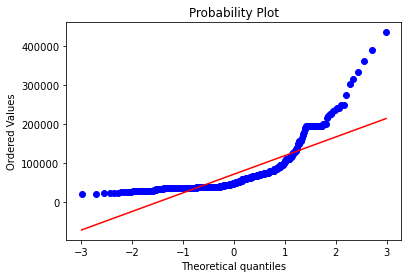

In [75]:
# Normality Test for MRP value

stats.probplot(df['MRP'], dist="norm", plot=plt)
plt.show()

### Shapiro Wilk Test for Normality

**Assumptions**

Observations in each sample are independent and identically distributed

**Interpretation**

H0: the sample has a Gaussian distribution.

H1: the sample does not have a Gaussian distribution.

In [76]:
def shapiro_wilk(data):
    stat, p = stats.shapiro(data)
    
    print('stat=%.3f, p=%.3f' % (stat, p))
    
    if p > 0.05:
        print('Probably Gaussian')
    else:
        print('Probably not Gaussian')
        
shapiro_wilk(df['MRP'])

stat=0.679, p=0.000
Probably not Gaussian


### Outliers Detection

In [77]:
def outliers(data,col):
    q1=data[col].quantile(0.25)
    q3=data[col].quantile(0.75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    outliers=data[(data[col]<lb) | (data[col]>ub)][col].shape[0]
    return outliers

print('Outliers in Price : ',outliers(df,'MRP'))

Outliers in Price :  55


In [78]:
# Identifying the inputs (X) and output (y)

y = df['MRP']  # Target Variable

X = df[['Processor', 'RAM', 'OS', 'Storage']]

### Train - Test Split

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [80]:
X_train.head()

,Processor,RAM,OS,Storage
242,Intel Core i7 Processor,16 GB LPDDR4X RAM,64 bit Windows 10 Operating System,1 TB SSD
681,AMD Ryzen 5 Quad Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
146,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD
47,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
73,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD


In [81]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(369, 4) (369,)
(123, 4) (123,)


### Data Transformation using Label Encoding

In [82]:
X_train_label = pd.DataFrame(index=X_train.index)

X_train_label.head()

""
242
681
146
47
73


In [83]:
X_train.Processor.unique()

array(['Intel Core i7 Processor', 'AMD Ryzen 5 Quad Core Processor',
       'Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'AMD Ryzen 3 Dual Core Processor',
       'AMD Ryzen 7 Octa Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Quad Core Processor', 'Intel Core i9 Processor',
       'Intel Pentium Quad Core Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Quad Core Processor',
       'AMD Athlon Dual Core Processor',
       'Intel Celeron Quad Core Processor',
       'Intel Pentium Silver Processor'], dtype=object)

In [84]:
processor_encoder={'Intel Core i3 Processor':13, 
                   'AMD Ryzen 5 Hexa Core Processor':2,
                   'AMD Ryzen 7 Quad Core Processor':4,
                   'AMD Ryzen 5 Quad Core Processor':3, 
                   'Intel Core i5 Processor':14,
                   'AMD Ryzen 3 Dual Core Processor':6,
                   'AMD Ryzen 7 Octa Core Processor':7,
                   'AMD Ryzen 9 Octa Core Processor':8,
                   'AMD Athlon Dual Core Processor':9,
                   'AMD Ryzen 3 Quad Core Processor':10,
                   'Intel Celeron Dual Core Processor':11,
                   'Intel Celeron Quad Core Processor':12, 
                   'Intel Core i7 Processor':16,
                   'Intel Core i9 Processor':17, 
                   'Intel Pentium Silver Processor':15,
                   'Intel Pentium Quad Core Processor':5, 
                   'AMD Dual Core Processor':1}

X_train_label['Processor']=X_train['Processor'].apply(lambda x : processor_encoder[x])
X_train_label.head()

,Processor
242,16
681,3
146,13
47,2
73,2


In [85]:
X_train.RAM.unique()

array(['16 GB LPDDR4X RAM', '8 GB DDR4 RAM', '16 GB DDR5 RAM',
       '16 GB DDR4 RAM', '8 GB LPDDR4X RAM', '4 GB DDR4 RAM',
       '16 GB LPDDR4 RAM', '32 GB DDR5 RAM', '32 GB DDR4 RAM',
       '32 GB LPDDR4X RAM', '8 GB DDR5 RAM', '16 GB LPDDR5 RAM',
       '4 GB LPDDR4X RAM'], dtype=object)

In [86]:
ram_encoder={'8 GB DDR4 RAM':4, 
                   '16 GB DDR4 RAM':10, 
                   '16 GB DDR5 RAM':11,
                   '4 GB DDR4 RAM':1, 
                   '8 GB LPDDR4X RAM':3, 
                   '16 GB LPDDR4X RAM':8,
                   '16 GB LPDDR5 RAM':9, 
                   '4 GB LPDDR4X RAM':2, 
                   '16 GB LPDDR4 RAM':7,
                   '32 GB DDR5 RAM':14, 
                   '8 GB DDR5 RAM':5, 
                   '32 GB DDR4 RAM':13,
                   '32 GB LPDDR4X RAM':12, 
                   '16 GB LPDDR3 RAM':6}

X_train_label['RAM']=X_train['RAM'].apply(lambda x : ram_encoder[x])
X_train_label.head()

,Processor,RAM
242,16,8
681,3,4
146,13,4
47,2,4
73,2,4


In [87]:
X_train.OS.unique()

array(['64 bit Windows 10 Operating System',
       '64 bit Windows 11 Operating System',
       '64 bit DOS Operating System'], dtype=object)

In [88]:
os_encoder={'64 bit Windows 11 Operating System':4,
            '64 bit Windows 10 Operating System':2,
            '32 bit Windows 11 Operating System':3,
            '64 bit DOS Operating System':1}

X_train_label['OS']=X_train['OS'].apply(lambda x : os_encoder[x])
X_train_label.head()

,Processor,RAM,OS
242,16,8,2
681,3,4,4
146,13,4,4
47,2,4,4
73,2,4,4


In [89]:
X_train.Storage.unique()

array(['1 TB SSD', '512 GB SSD', '256 GB SSD', '1 TB HDD', '2 TB SSD',
       '128 GB SSD', '1 TB HDD256 GB SSD', '1 TB HDD512 GB SSD'],
      dtype=object)

In [90]:
storage_encoder={'512 GB SSD':3, 
            '256 GB SSD':2, 
            '1 TB SSD':7, 
            '1 TB HDD':4,
            '1 TB HDD256 GB SSD':5, 
            '2 TB SSD':8, 
            '128 GB SSD':1,
            '1 TB HDD512 GB SSD':6}

X_train_label['Storage']=X_train['Storage'].apply(lambda x : storage_encoder[x])
X_train_label.head()

,Processor,RAM,OS,Storage
242,16,8,2,7
681,3,4,4,3
146,13,4,4,2
47,2,4,4,3
73,2,4,4,3


### Data Pre-Processing on Test Data

In [91]:
X_test.head()

,Processor,RAM,OS,Storage
276,AMD Ryzen 3 Dual Core Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
375,Intel Core i9 Processor,32 GB DDR5 RAM,64 bit Windows 11 Operating System,1 TB SSD
577,AMD Ryzen 7 Octa Core Processor,32 GB DDR5 RAM,64 bit Windows 11 Operating System,2 TB SSD
474,Intel Core i5 Processor,16 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD
205,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD


In [92]:
X_test_label = pd.DataFrame(index = X_test.index)

X_test_label.head()

""
276
375
577
474
205


In [93]:
X_test_label['Processor']=X_test['Processor'].apply(lambda x : processor_encoder[x])
X_test_label['RAM']=X_test['RAM'].apply(lambda x : ram_encoder[x])
X_test_label['OS']=X_test['OS'].apply(lambda x : os_encoder[x])
X_test_label['Storage']=X_test['Storage'].apply(lambda x : storage_encoder[x])

X_test_label.head()

,Processor,RAM,OS,Storage
276,6,4,4,3
375,17,14,4,7
577,7,14,4,8
474,14,10,4,3
205,13,4,4,3


## Model Building

### Linear Regression

In [94]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_label, y_train)

LinearRegression()

In [95]:
y_test_pred = regressor.predict(X_test_label)

In [96]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
276,35590.0,47025.064837
375,301990.0,193423.214880
577,249990.0,204387.311782
474,79990.0,95365.736705
205,36990.0,51108.724092


<AxesSubplot:xlabel='MRP', ylabel='Count'>

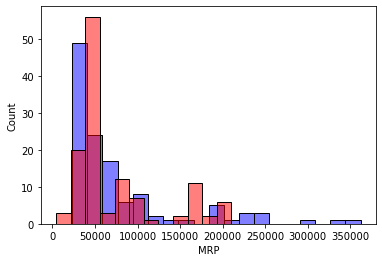

In [97]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [98]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  31372.051501414033


### KNN Regression

In [99]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_label, y_train)

KNeighborsRegressor()

In [100]:
y_test_pred = regressor.predict(X_test_label)

In [101]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
276,35590.0,35270.0
375,301990.0,307958.0
577,249990.0,170590.0
474,79990.0,67890.0
205,36990.0,42991.8


<AxesSubplot:xlabel='MRP', ylabel='Count'>

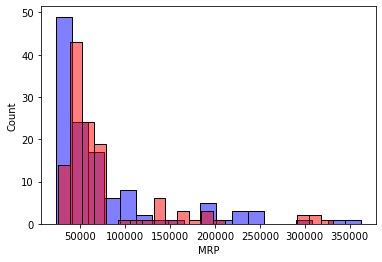

In [102]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [103]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  30025.660928964386


### Decision Tree Regression

In [104]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_label, y_train)

DecisionTreeRegressor()

In [105]:
y_test_pred = regressor.predict(X_test_label)

In [106]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
276,35590.0,36333.333333
375,301990.0,434830.000000
577,249990.0,314990.000000
474,79990.0,72040.166667
205,36990.0,40156.151515


<AxesSubplot:xlabel='MRP', ylabel='Count'>

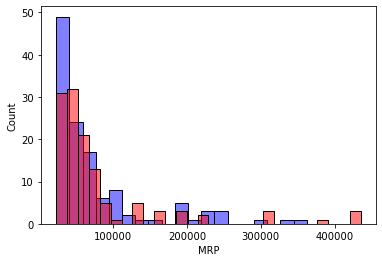

In [107]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [108]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  35061.56453324315


### Random Forest Regression

In [109]:
from sklearn.ensemble import RandomForestRegressor
regressor_rf = RandomForestRegressor()
regressor_rf.fit(X_train_label, y_train)

RandomForestRegressor()

In [110]:
y_test_pred = regressor_rf.predict(X_test_label)

In [111]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
276,35590.0,36288.487733
375,301990.0,353095.994872
577,249990.0,285044.047619
474,79990.0,72394.193565
205,36990.0,40116.572312


<AxesSubplot:xlabel='MRP', ylabel='Count'>

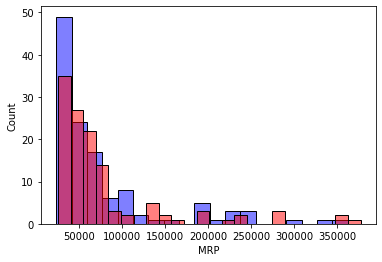

In [112]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [113]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  23303.402168931534


### Voting Regressor

In [114]:
from sklearn.ensemble import VotingRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [115]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train_label, y_train)

In [116]:
y_test_pred = ereg.predict(X_test_label)

In [117]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

temp_df.head()

,Actual,Predicted
276,35590.0,40451.767526
375,301990.0,315406.821671
577,249990.0,255416.735982
474,79990.0,80157.582410
205,36990.0,44359.755013


<AxesSubplot:xlabel='MRP', ylabel='Count'>

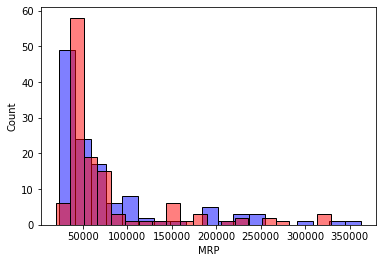

In [118]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5)

In [119]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Root Mean Squared Error:  20140.849325272295


### Stacking Regressor

In [120]:
from sklearn.ensemble import StackingRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [121]:
estimators = [
    ('lr', LinearRegression()),
    ("knn",KNeighborsRegressor(10)),
    ('rf',RandomForestRegressor(random_state=1))]

stack_regressor = StackingRegressor(estimators=estimators,
                                      final_estimator=LinearRegression())

stack_regressor.fit(X_train_label, y_train)

StackingRegressor(estimators=[('lr', LinearRegression()),
                              ('knn', KNeighborsRegressor(n_neighbors=10)),
                              ('rf', RandomForestRegressor(random_state=1))],
                  final_estimator=LinearRegression())

In [122]:
predictions = stack_regressor.predict(X_test_label)

In [123]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
276,35590.0,35601.378870
375,301990.0,369465.561923
577,249990.0,282344.282718
474,79990.0,72125.755666
205,36990.0,39644.445370


<AxesSubplot:xlabel='MRP', ylabel='Count'>

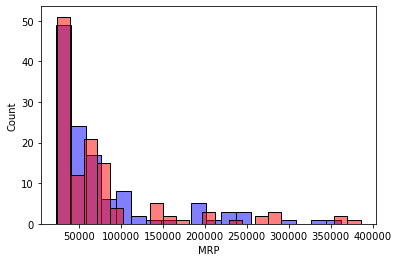

In [124]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [125]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  24914.185721272464


### AdaBoost Regressor

In [126]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [127]:
adaboost_Regressor = AdaBoostRegressor()

adaboost_Regressor.fit(X_train_label, y_train)

AdaBoostRegressor()

In [128]:
predictions = adaboost_Regressor.predict(X_test_label)

In [129]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
276,35590.0,46868.243119
375,301990.0,412410.000000
577,249990.0,254990.000000
474,79990.0,84013.128571
205,36990.0,46868.243119


<AxesSubplot:xlabel='MRP', ylabel='Count'>

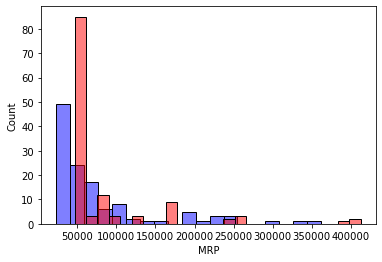

In [130]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [131]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  31361.828313585644


### GBDT Regressor

In [132]:
from sklearn.ensemble import GradientBoostingRegressor
model_gbdt = GradientBoostingRegressor()

model_gbdt.fit(X_train_label, y_train)

GradientBoostingRegressor()

In [133]:
predictions = model_gbdt.predict(X_test_label)

In [134]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
276,35590.0,37996.797932
375,301990.0,390136.428029
577,249990.0,280169.729499
474,79990.0,73116.715476
205,36990.0,41831.145818


<AxesSubplot:xlabel='MRP', ylabel='Count'>

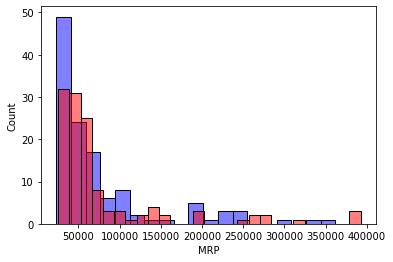

In [135]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [136]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  24167.989726824


### XGBoost Regressor

In [137]:
import xgboost as xgb
from xgboost import XGBRegressor

model_xgb = XGBRegressor()

model_xgb.fit(X_train_label, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [138]:
predictions = model_xgb.predict(X_test_label)

In [139]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

temp_df.head()

,Actual,Predicted
276,35590.0,36335.214844
375,301990.0,380850.750000
577,249990.0,292861.875000
474,79990.0,72026.656250
205,36990.0,40159.421875


<AxesSubplot:xlabel='MRP', ylabel='Count'>

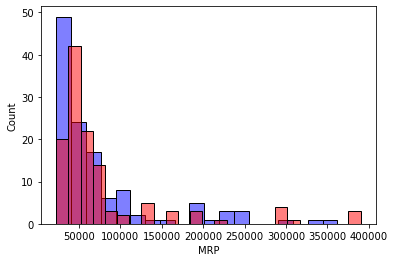

In [140]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(predictions, color='red', alpha=0.5)

In [141]:
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Root Mean Squared Error:  26575.651709153015


### Summary

In [142]:
dataframe = {'Algorithm' : ['Linear Regression','KNN','Decision Tree',
                            'Random Forest','Voting','Stacking','AdaBoost','GBDT','XGBoost'],
            'RMSE' : [31372.05,30025.66,32008.61,23266.18,20140.84,24914.18,31967.53,24262.68,26575.65]}

summary = pd.DataFrame(dataframe,index=[1,2,3,4,5,6,7,8,9])
summary.sort_values(by=['RMSE'])

,Algorithm,RMSE
5,Voting,20140.84
4,Random Forest,23266.18
8,GBDT,24262.68
6,Stacking,24914.18
9,XGBoost,26575.65
2,KNN,30025.66
1,Linear Regression,31372.05
7,AdaBoost,31967.53
3,Decision Tree,32008.61


### Price Prediction

In [143]:
import pickle
#pickle.dump(ereg,open('voting.pkl','wb'))
voting=pickle.load(open('voting.pkl','rb'))

In [144]:
import gradio as gr

In [145]:
def predict(Processor,RAM,OS,Storage):
    
    data=pd.DataFrame([[Processor,RAM,OS,Storage]],columns=['processor','ram','os','storage'])
    data_=pd.DataFrame(index=data.index)
    
    global processor_encoder
    global ram_encoder
    global os_encoder
    global storage_encoder
    
    data_['processor']=data['processor'].apply(lambda x : processor_encoder[x])
    data_['ram']=data['ram'].apply(lambda x : ram_encoder[x])
    data_['os']=data['os'].apply(lambda x : os_encoder[x])
    data_['storage']=data['storage'].apply(lambda x : storage_encoder[x])
    
    
    Price=voting.predict(data_)
    return Price    

In [146]:
pred=gr.Interface(fn=predict,inputs=[gr.Dropdown(['Intel Core i3 Processor',
 'AMD Ryzen 5 Hexa Core Processor',
 'AMD Ryzen 7 Quad Core Processor',
 'AMD Ryzen 5 Quad Core Processor',
 'Intel Core i5 Processor',
 'AMD Ryzen 3 Dual Core Processor',
 'AMD Ryzen 7 Octa Core Processor',
 'AMD Ryzen 9 Octa Core Processor',
 'AMD Athlon Dual Core Processor',
 'AMD Ryzen 3 Quad Core Processor',
 'Intel Celeron Dual Core Processor',
 'Intel Celeron Quad Core Processor',
 'Intel Core i7 Processor',
 'Intel Core i9 Processor',
 'Intel Pentium Silver Processor',
 'Intel Pentium Quad Core Processor',
 'AMD Dual Core Processor']),
                                    gr.Dropdown(['8 GB DDR4 RAM',
 '16 GB DDR4 RAM',
 '16 GB DDR5 RAM',
 '4 GB DDR4 RAM',
 '8 GB LPDDR4X RAM',
 '16 GB LPDDR4X RAM',
 '16 GB LPDDR5 RAM',
 '4 GB LPDDR4X RAM',
 '16 GB LPDDR4 RAM',
 '32 GB DDR5 RAM',
 '8 GB DDR5 RAM',
 '32 GB DDR4 RAM',
 '32 GB LPDDR4X RAM',
 '16 GB LPDDR3 RAM']),
                                     gr.Dropdown(['64 bit Windows 11 Operating System',
 '64 bit Windows 10 Operating System',
 '32 bit Windows 11 Operating System',
 '64 bit DOS Operating System']),
                                    gr.Dropdown(['256 GB SSD',
 '512 GB SSD',
 '1 TB HDD256 GB SSD',
 '1 TB SSD',
 '128 GB SSD',
 '1 TB HDD',
 '1 TB HDD512 GB SSD',
 '2 TB SSD'])],
                                    outputs='number')




In [147]:
pred.launch(debug=True)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


S:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- os
- processor
- ram
- storage
Feature names seen at fit time, yet now missing:
- OS
- Processor
- RAM
- Storage

  warnings.warn(message, FutureWarning)
S:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- os
- processor
- ram
- storage
Feature names seen at fit time, yet now missing:
- OS
- Processor
- RAM
- Storage

  warnings.warn(message, FutureWarning)
S:\Anaconda\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- os
- processor
- ram
- storage
Feature names se

Keyboard interruption in main thread... closing server.


### Business Insights

- According to the analysis, companies like LENEVO, ASUS, HP, & DELL are ruling in the entire laptop market.
- Around 50% of laptop price varies between 20000 to 50000.
- If I talk about in premium segment like APPLE only 10% of laptop is above 150000.
- I came into conclusion that in most of the laptops are having Intel core i3 processor, 64 bit Windows 11 Operating System , 8 GB RAM and 515 SSD.
- APPLE, ASUS & DELL are having highest price among other companies.